In [0]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs

Cloning into 'german-traffic-signs'...
remote: Counting objects: 6, done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 6 (delta 0), reused 0 (delta 0)
Unpacking objects: 100% (6/6), done.


In [0]:
!ls german-traffic-signs

signnames.csv  test.p  train.p	valid.p


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
import pandas as pd
import pickle
import cv2
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [0]:
with open('german-traffic-signs/train.p', 'rb') as f:
    train_data = pickle.load(f)
with open('german-traffic-signs/valid.p', 'rb') as f:
    val_data = pickle.load(f)
with open('german-traffic-signs/test.p', 'rb') as f:
    test_data = pickle.load(f)

In [0]:
X_train, y_train = train_data['features'], train_data['labels']
X_val, y_val = val_data['features'], val_data['labels']
X_test, y_test = test_data['features'], test_data['labels']

In [0]:
X_train.shape

(34799, 32, 32, 3)

In [0]:
y_train.shape

(34799,)

In [0]:
X_test.shape

(12630, 32, 32, 3)

In [0]:
X_val.shape

(4410, 32, 32, 3)

In [0]:
y_test.shape

(12630,)

In [0]:
data = pd.read_csv('german-traffic-signs/signnames.csv')

In [0]:
data

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


0 : 180
1 : 1980
2 : 2010
3 : 1260
4 : 1770
5 : 1650
6 : 360
7 : 1290
8 : 1260
9 : 1320
10 : 1800
11 : 1170
12 : 1890
13 : 1920
14 : 690
15 : 540
16 : 360
17 : 990
18 : 1080
19 : 180
20 : 300
21 : 270
22 : 330
23 : 450
24 : 240
25 : 1350
26 : 540
27 : 210
28 : 480
29 : 240
30 : 390
31 : 690
32 : 210
33 : 599
34 : 360
35 : 1080
36 : 330
37 : 180
38 : 1860
39 : 270
40 : 300
41 : 210
42 : 210


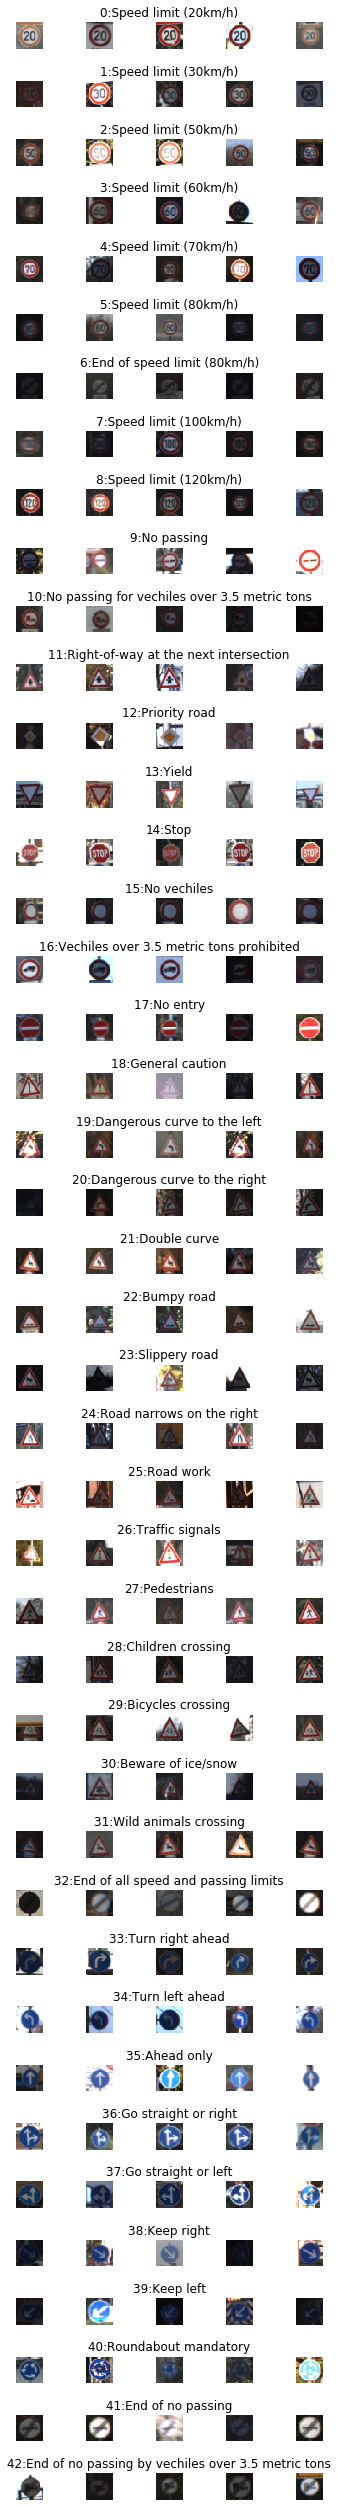

In [0]:
fig, axs = plt.subplots(nrows = 43, ncols= 5, figsize = (5,35))
fig.tight_layout()
for j in range(43):
    for i in range(5):
        axs[j][i].imshow(X_train[y_train==j][np.random.randint(0,len(X_train[y_train==j])-1),:,:], cmap ='gray')
        axs[j][i].axis('off')
    axs[j][2].set_title(str(j) + ':' + data['SignName'].iloc[j])
    print(str(j) + ' : ' + str(len(X_train[y_train==j])))

In [0]:
y_train = keras.utils.np_utils.to_categorical(y_train, 43)
y_test = keras.utils.np_utils.to_categorical(y_test, 43)
y_val = keras.utils.np_utils.to_categorical(y_val, 43)

In [0]:
y_train.shape

(34799, 43)

(-0.5, 31.5, 31.5, -0.5)

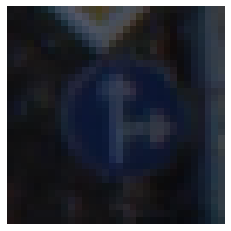

In [0]:
plt.imshow(X_train[1000])
plt.axis('off')

(-0.5, 31.5, 31.5, -0.5)

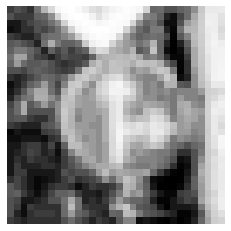

In [0]:
img = X_train[1000]
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.equalizeHist(img)
plt.imshow(img, cmap='gray')
plt.axis('off')

In [0]:
img.shape

(32, 32)

In [0]:
def preproc(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.equalizeHist(img)
    return img/255

In [0]:
X_train = np.array(list(map(preproc, X_train)))
X_test = np.array(list(map(preproc, X_test)))
X_val = np.array(list(map(preproc, X_val)))

In [0]:
X_train.shape

(34799, 32, 32)

(-0.5, 31.5, 31.5, -0.5)

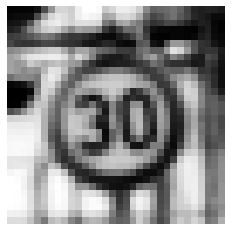

In [0]:
plt.imshow(X_train[np.random.randint(0,len(X_train)-1)], cmap='gray')
plt.axis('off')

In [0]:
X_train = X_train.reshape(X_train.shape[0], 32,32,1)
X_test = X_test.reshape(X_test.shape[0], 32,32,1)
X_val = X_val.reshape(X_val.shape[0], 32,32,1)

In [0]:
X_train.shape

(34799, 32, 32, 1)

In [0]:
def build_model():
    model = Sequential()
    model.add(Conv2D(60, (5,5), input_shape = (32, 32,1), activation = 'relu'))
    model.add(Conv2D(60, (5,5), activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.5))
    
    model.add(Conv2D(30, (3,3), activation = 'relu'))
    model.add(Conv2D(30, (3,3), activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.5))
    
    model.add(Flatten())
    
    model.add(Dense(units = 500, activation ='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(units = 100, activation ='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(units = 43, activation ='softmax'))
    model.compile(optimizer = Adam(lr = 0.001), loss = 'categorical_crossentropy',
                 metrics = ['accuracy'])
    return model
    

In [0]:
model = build_model()
model.summary()






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 60)        1560      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 60)        90060     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 60)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 60)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 30)        16230     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 30)          8130     

In [0]:
m = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = 10,
             batch_size = 200, shuffle = 1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 34799 samples, validate on 4410 samples
Epoch 1/10





34799/34799 [==============================] - 19s 548us/step - loss: 3.0826 - acc: 0.1737 - val_loss: 1.6406 - val_acc: 0.5043
Epoch 2/10
34799/34799 [==============================] - 4s 124us/step - loss: 1.3426 - acc: 0.5902 - val_loss: 0.4557 - val_acc: 0.8667
Epoch 3/10
34799/34799 [==============================] - 4s 124us/step - loss: 0.7707 - acc: 0.7586 - val_loss: 0.2684 - val_acc: 0.9154
Epoch 4/10
34799/34799 [==============================] - 4s 125us/step - loss: 0.5608 - acc: 0.8212 - val_loss: 0.2214 - val_acc: 0.9338
Epoch 5/10
34799/34799 [==============================] - 4s 124us/step - loss: 0.4512 - acc: 0.8589 - val_loss: 0.2001 - val_acc: 0.9426
Epoch 6/10
34799/34799 [==============================] - 4s 124us/step - loss: 0.3801 - acc: 0.8829 - val_loss: 0.1207 - val_acc: 0.9660
Epoch 7/10
34799/347

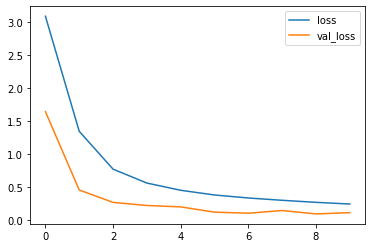

In [0]:
plt.plot(m.history['loss'], label = 'loss')
plt.plot(m.history['val_loss'], label = 'val_loss')
plt.legend()

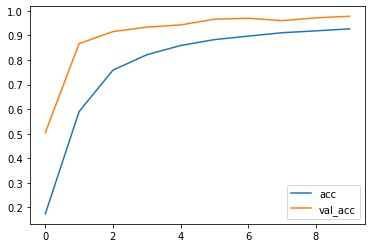

In [0]:
plt.plot(m.history['acc'], label = 'acc')
plt.plot(m.history['val_acc'], label = 'val_acc')
plt.legend()

In [0]:
score = model.evaluate(X_test,y_test)

12630/12630 [==============================] - 1s 90us/step


In [0]:
score

[0.15308102985588878, 0.9551860649719752]